In [1]:
import os
import yaml
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
class YOLOSegmentationVisualizer:
    def __init__(self, yaml_path):
        # Load class names from yaml file
        with open(yaml_path, 'r') as f:
            self.yaml_data = yaml.safe_load(f)
            self.class_names = self.yaml_data['names']
    
    def read_yolo_label(self, label_path):
        segments = []
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    data = line.strip().split()
                    class_id = int(data[0])
                    # Extract polygon points
                    points = [float(x) for x in data[1:]]
                    # Reshape points into pairs of x,y coordinates
                    polygon = np.array(points).reshape(-1, 2)
                    segments.append([class_id, polygon])
        return segments

    def plot_image_with_segments(self, image_path, label_path):
        # Read image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width = image.shape[:2]
        
        # Read labels
        segments = self.read_yolo_label(label_path)
        
        # Create figure and axes
        fig, ax = plt.subplots(1, figsize=(12, 8))
        ax.imshow(image)
        
        # Generate random colors for each class
        np.random.seed(42)
        colors = np.random.rand(len(self.class_names), 3)
        
        # Plot each segment
        for segment in segments:
            class_id, polygon = segment
            
            # Convert normalized coordinates to pixel coordinates
            polygon[:, 0] *= width
            polygon[:, 1] *= height
            
            # Create polygon patch
            polygon_patch = plt.Polygon(polygon, 
                                      fill=True, 
                                      alpha=0.4, 
                                      color=colors[class_id],
                                      linewidth=2)
            ax.add_patch(polygon_patch)
            
            # Add label
            class_name = self.class_names[class_id]
            centroid = np.mean(polygon, axis=0)
            ax.text(centroid[0], centroid[1], class_name, 
                   color='white', 
                   fontsize=10, 
                   bbox=dict(facecolor=colors[class_id], alpha=0.8))
        
        plt.axis('off')
        plt.show()
        
    def visualize_single_image(self, image_path, label_path=None):
        """
        Visualize a single image with its segmentation mask
        Args:
            image_path: Path to the image file
            label_path: Path to the label file. If None, will try to find the corresponding label file
        """
        if label_path is None:
            # Try to find the corresponding label file
            image_dir = os.path.dirname(image_path)
            image_name = os.path.splitext(os.path.basename(image_path))[0]
            label_dir = os.path.join(os.path.dirname(os.path.dirname(image_dir)), 'labels')
            label_path = os.path.join(label_dir, image_name + '.txt')
        
        print(f"Visualizing: {os.path.basename(image_path)}")
        self.plot_image_with_segments(image_path, label_path)

    def visualize_batch(self, images_dir, labels_dir, num_images=5):
        """
        Visualize a batch of images with their segmentation masks
        """
        image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        for image_file in image_files[:num_images]:
            image_path = os.path.join(images_dir, image_file)
            label_path = os.path.join(labels_dir, os.path.splitext(image_file)[0] + '.txt')
            
            print(f"Visualizing: {image_file}")
            self.plot_image_with_segments(image_path, label_path)


# Single Image

Visualizing: 2011_Acura_TL_59.jpeg


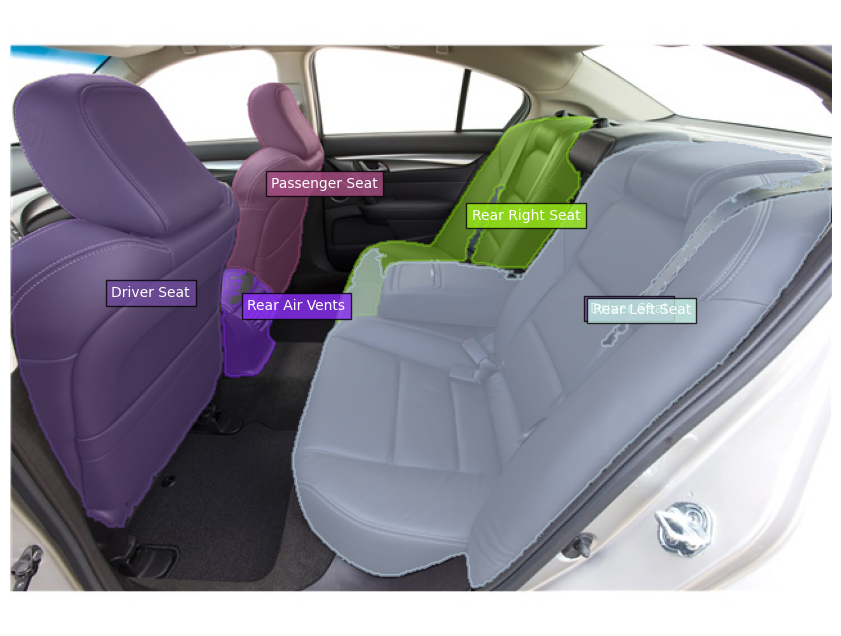

In [3]:
# Usage example
if __name__ == "__main__":
    # Initialize visualizer
    yaml_path = r'd:\OneDrive - Personal\FleetBlox\Data\Original Data\Car Damage\Interior\YOLOv11 SAM Auto Annotation - Car Interior\Original\data.yaml'
    visualizer = YOLOSegmentationVisualizer(yaml_path)
    
    # Example 1: Visualize a single image
    image_path = r'd:\OneDrive - Personal\FleetBlox\Data\Original Data\Car Damage\Interior\YOLOv11 SAM Auto Annotation - Car Interior\Original\train\images\2011_Acura_TL_59.jpeg'
    label_path = r'd:\OneDrive - Personal\FleetBlox\Data\Original Data\Car Damage\Interior\YOLOv11 SAM Auto Annotation - Car Interior\Original\train\labels\2011_Acura_TL_59.txt'
    visualizer.visualize_single_image(image_path, label_path)

# All Images in a Folder

Visualizing: 09-2024-cadillac-xt4-door-controls-jms.jpg


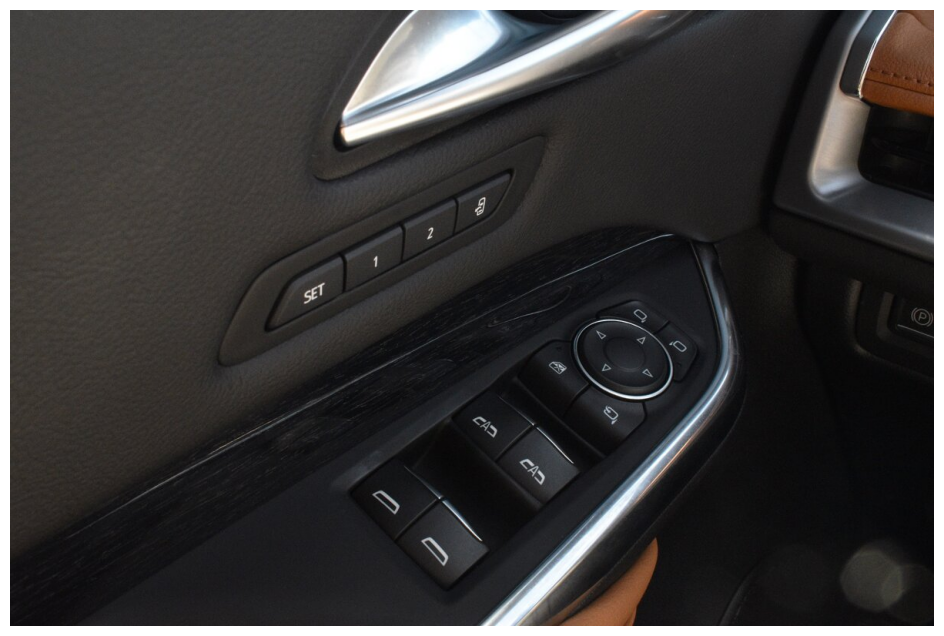

Visualizing: 11-2024-cadillac-xt4-air-vents-jms.jpg


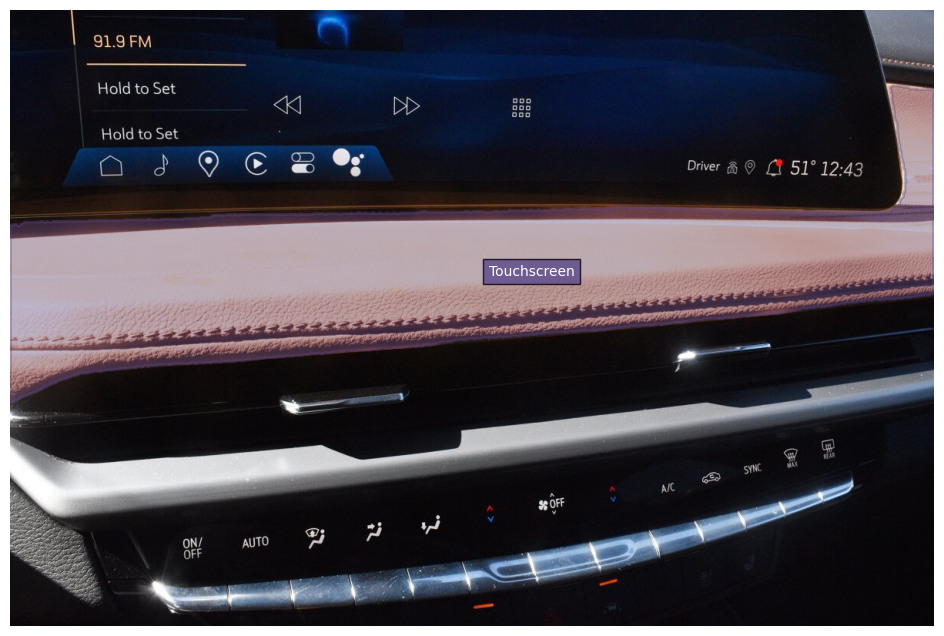

Visualizing: 12Volt_041.jpg


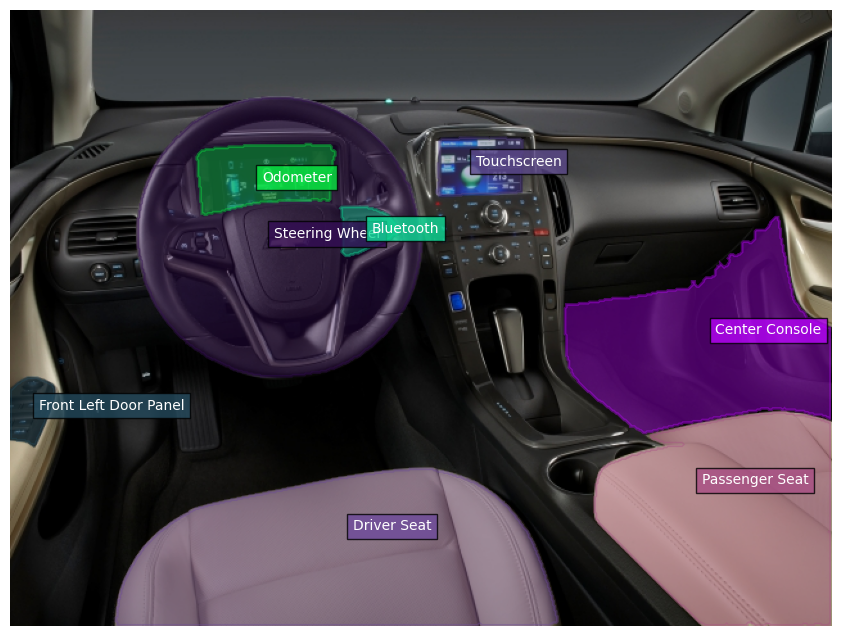

In [ ]:
# Usage example
if __name__ == "__main__":
    # Initialize visualizer
    yaml_path = r'd:\OneDrive - Personal\FleetBlox\Data\Original Data\Car Damage\Interior\YOLOv11 SAM Auto Annotation - Car Interior\Original\data.yaml'
    visualizer = YOLOSegmentationVisualizer(yaml_path)
    
    # Example 2: Visualize a batch of images
    images_dir = r'd:\OneDrive - Personal\FleetBlox\Data\Original Data\Car Damage\Interior\YOLOv11 SAM Auto Annotation - Car Interior\Original\train\images'  # Path to your images directory
    labels_dir = r'd:\OneDrive - Personal\FleetBlox\Data\Original Data\Car Damage\Interior\YOLOv11 SAM Auto Annotation - Car Interior\Original\train\labels'  # Path to your labels directory
    visualizer.visualize_batch(images_dir, labels_dir, num_images=3) # Adjust num_images as you wish